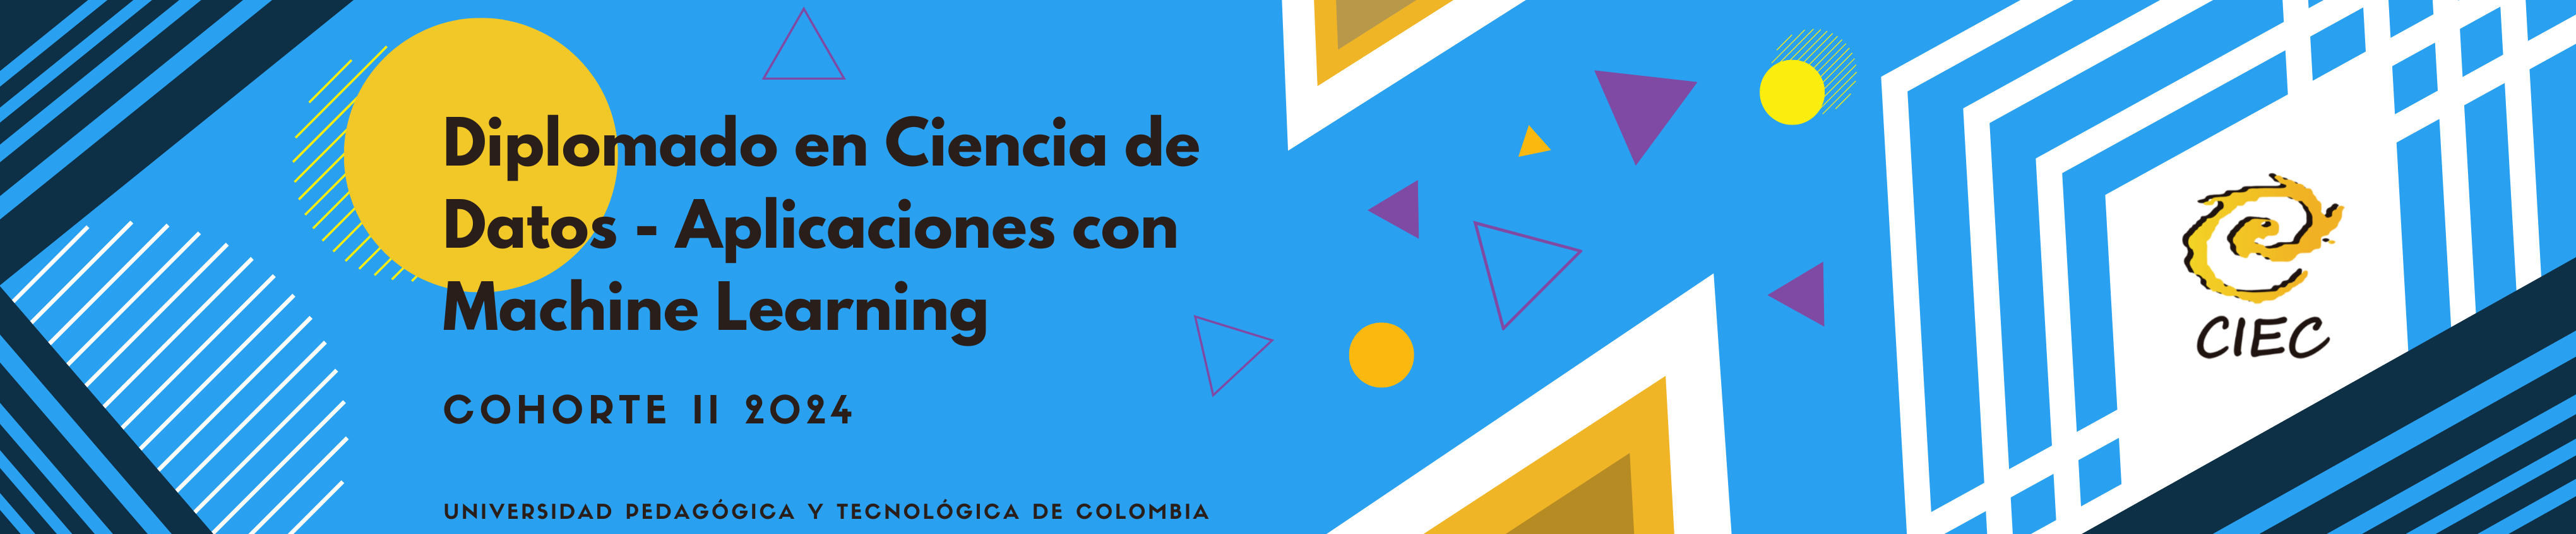

<h1 style="color: #FECB05; text-align: center;"> Curvas de entrenamiento </h1>

<h2 style="color: #007ACC;">Autores</h2>

- [Juan Felipe Contreras Alcívar](https://www.linkedin.com/in/juanf-contreras/)

---

<h2 style="color: #007ACC;">Tabla de contenido</h2>

- [<span style="color: #005C99;">Introducción</span>](#introduction)
- [<span style="color: #005C99;">Descenso de gradiente</span>](#dim-curse)
- [<span style="color: #005C99;">Referencias</span>](#reference)

---

<h2 style="color: #007ACC;"> Introducción </h2>

Las curvas de entrenamiento son una herramienta fundamental en el proceso de desarrollo y evaluación de modelos de redes neuronales. Estas curvas ofrecen una visión detallada de cómo evoluciona el rendimiento del modelo a lo largo del proceso de entrenamiento, proporcionando información crucial para ajustar parámetros, identificar problemas de convergencia y comprender la capacidad de generalización del modelo.

Al observar las curvas de entrenamiento, se puede visualizar cómo cambian métricas clave como la pérdida (loss) o la exactitud (accuracy) en cada epoch de entrenamiento. Estas curvas ofrecen pistas sobre la eficacia del algoritmo de optimización, la complejidad del modelo y la presencia de problemas como sobreajuste (overfitting) o subajuste (underfitting).

Entender y analizar las curvas de entrenamiento es fundamental para tomar decisiones informadas durante el desarrollo de modelos de redes neuronales, permitiendo mejorar la arquitectura del modelo, ajustar hiperparámetros y optimizar el proceso de entrenamiento para lograr un rendimiento óptimo en tareas específicas. En este sentido, las curvas de entrenamiento son una herramienta invaluable en el arsenal del científico de datos y el ingeniero de aprendizaje automático.

Consideremos un conjunto de datos de entrenamiento $D$ que contiene $N$ observaciones. Cada muestra está compuesta por una entrada $x_i$ y su correspondiente etiqueta o salida esperada $y_i$, donde.

Una red neuronal generalmente se entrena utilizando un algoritmo de optimización como el descenso de gradiente, que actualiza los pesos del modelo para minimizar una función de pérdida $L$. Esta función de pérdida evalúa la discrepancia entre las predicciones del modelo y las etiquetas verdaderas.

Durante el entrenamiento, la red neuronal ajusta iterativamente sus pesos para minimizar la pérdida sobre el conjunto de datos de entrenamiento. Esta optimización se realiza a través de lotes de datos de tamaño $batch_size$. Entonces, en cada paso de entrenamiento, se selecciona un lote de tamaño $batch\_size$ del conjunto de datos de entrenamiento y se calcula la pérdida promedio sobre ese lote.

Suponiendo que el modelo tiene $M$ parámetros entrenables (pesos y sesgos), el proceso de actualización de pesos se puede describir de la siguiente manera:

1. Seleccionar un lote de tamaño $batch\_size$ del conjunto de datos de entrenamiento: $\{x_{i_1}, x_{i_2}, ..., x_{i_{batch\_size}}\}$.

2. Calcular las predicciones del modelo para el lote seleccionado: $\hat{y}_{i_1}, \hat{y}_{i_2}, ..., \hat{y}_{i_{batch\_size}} = f(x_{i_1}, x_{i_2}, ..., x_{i_{batch\_size}})$.

3. Calcular la pérdida promedio sobre el lote: $L_{batch} = \frac{1}{batch\_size} \sum_{j=1}^{batch\_size} L(\hat{y}_{i_j}, y_{i_j})$.

4. Actualizar los pesos del modelo utilizando el gradiente descendente de la pérdida con respecto a los parámetros: $w^{t} = w^{t-1} - \eta \nabla_{w} L_{batch} $, donde $\eta$ es la tasa de aprendizaje y $\nabla_{w} L_{batch}$ es el gradiente de la pérdida con respecto a los parámetros.

El proceso anterior se repite para múltiples épocas, donde una época completa implica pasar por todo el conjunto de datos de entrenamiento una vez. Esto se repite hasta que se alcanza un criterio de detención, como un número fijo de épocas o una convergencia satisfactoria de la pérdida.

Adicionalmente, puede añadirse al algoritmo anterior el uso de datos de validación; los cuáles se utilizan para evaluar el rendimiento del modelo durante el entrenamiento y ajustar los hiperparámetros para evitar el sobreajuste. A continuación algunos puntos importantes sobre este proceso:

1. Durante cada época de entrenamiento, después de actualizar los pesos del modelo utilizando el conjunto de datos de entrenamiento, se evalúa el rendimiento del modelo en el conjunto de datos de validación.

2. Para cada paso de evaluación en el conjunto de datos de validación, se calcula la pérdida y posiblemente otras métricas de rendimiento.

3. Estas métricas de rendimiento en el conjunto de datos de validación se utilizan para monitorear el progreso del modelo durante el entrenamiento y tomar decisiones sobre ajustes en la arquitectura del modelo o los hiperparámetros.

4. Por ejemplo, si la pérdida en el conjunto de datos de validación comienza a aumentar después de un cierto número de épocas, podría ser un signo de sobreajuste, lo que sugiere detener el entrenamiento o ajustar los hiperparámetros para evitar que el modelo memorice el conjunto de datos de entrenamiento.

El análisis de las curvas de validación permiten extraer conclusiones sobre la necesidad de modificar el número de neuronas o de capas ocultas en el modelo.

<h2 style="color: #007ACC;">Ejemplo </h2>

In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Load California housing dataset
housing = fetch_california_housing()

# Split dataset into features and target variable
X = housing.data
y = housing.target

In [3]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Define the regression model
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu')) # 20 neurons in the hidden layer
model.add(Dense(1)) # Single neuron in the output layer for regression

In [6]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=5)

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error:", mse)

Epoch 1/50
   1/2642 [..............................] - ETA: 6:27 - loss: 5.5591

2024-05-30 14:40:08.290422: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2642/2642 [==============================] - 1s 417us/step - loss: 1.2034 - val_loss: 0.5496
Epoch 2/50
2642/2642 [==============================] - 1s 393us/step - loss: 0.5010 - val_loss: 0.4735
Epoch 3/50
2642/2642 [==============================] - 1s 381us/step - loss: 0.4404 - val_loss: 0.4470
Epoch 4/50
2642/2642 [==============================] - 1s 369us/step - loss: 0.4039 - val_loss: 0.4223
Epoch 5/50
2642/2642 [==============================] - 1s 399us/step - loss: 0.3833 - val_loss: 0.4082
Epoch 6/50
2642/2642 [==============================] - 1s 391us/step - loss: 0.3694 - val_loss: 0.3963
Epoch 7/50
2642/2642 [==============================] - 1s 396us/step - loss: 0.3661 - val_loss: 0.3861
Epoch 8/50
2642/2642 [==============================] - 1s 399us/step - loss: 0.3548 - val_loss: 0.3933
Epoch 9/50
2642/2642 [==============================] - 1s 422us/step - loss: 0.3497 - val_loss: 0.3749
Epoch 10/50
2642/2642 [==============================] - 1s 396us/step - lo

In [9]:
history.history

{'loss': [1.2034404277801514,
  0.5010408163070679,
  0.44044411182403564,
  0.4039413332939148,
  0.3832845985889435,
  0.36942046880722046,
  0.3661072850227356,
  0.3547705113887787,
  0.3496741056442261,
  0.3503199815750122,
  0.3423297703266144,
  0.3388112187385559,
  0.33516737818717957,
  0.33465462923049927,
  0.32764631509780884,
  0.3319418430328369,
  0.32357287406921387,
  0.32672399282455444,
  0.3263113498687744,
  0.31811773777008057,
  0.3204125761985779,
  0.3193254768848419,
  0.3239811360836029,
  0.31528040766716003,
  0.3170809745788574,
  0.31496691703796387,
  0.31647059321403503,
  0.31063327193260193,
  0.3155490756034851,
  0.31247037649154663,
  0.31440073251724243,
  0.31218039989471436,
  0.31680193543434143,
  0.30807387828826904,
  0.31036821007728577,
  0.30941498279571533,
  0.31283897161483765,
  0.3105684220790863,
  0.30884552001953125,
  0.311183899641037,
  0.30570533871650696,
  0.3067779541015625,
  0.3101104497909546,
  0.30642184615135193,
  

In [10]:
import matplotlib.pyplot as plt

def plot_training_curves(history, metrics):

    if isinstance(history, dict):
        history_dict = history
    else:
        history_dict = history.history

    plt.figure(figsize=(12, 5))
    
    for i, metric in enumerate(metrics):
        plt.subplot(1, len(metrics), i + 1)
        plt.plot(history_dict[metric], label=f'Training {metric}')
        plt.plot(history_dict[f'val_{metric}'], label=f'Validation {metric}')
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.title(f'Training and Validation {metric.capitalize()}')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

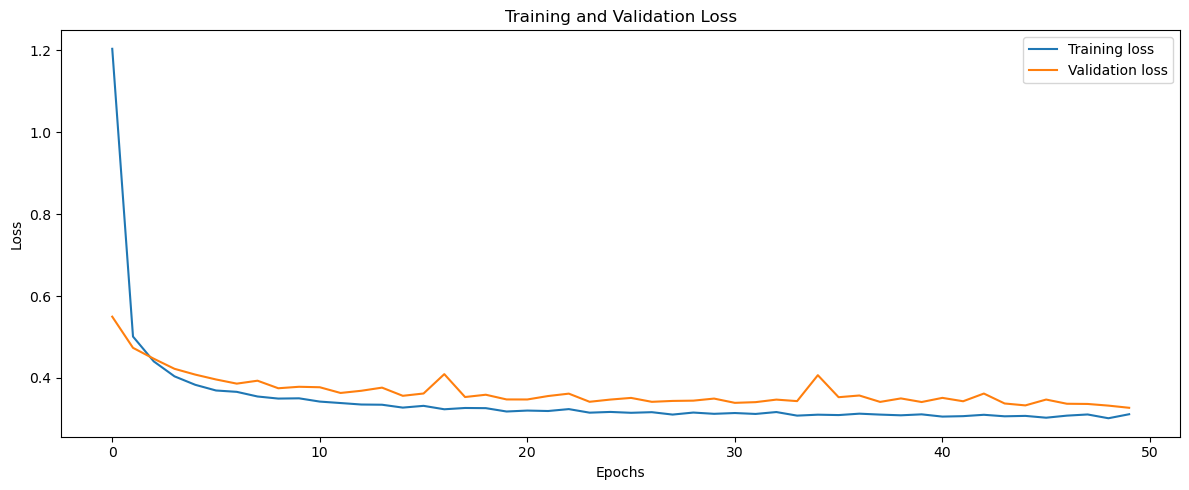

In [11]:
plot_training_curves(history, ['loss'])

<h2 style="color: #007ACC;"> Ejemplos de curvas de validación </h2>

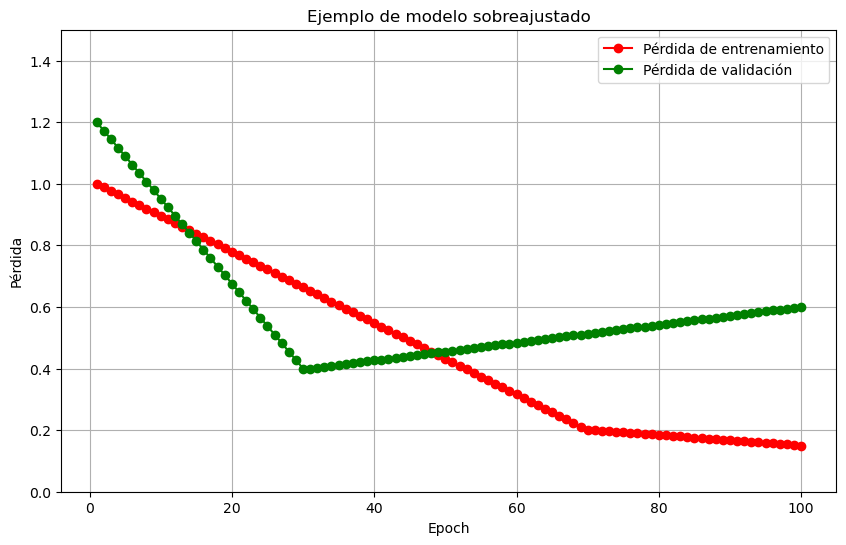

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate epochs
epochs = np.arange(1, 101)

# Simulate training and validation loss
train_loss = np.hstack([np.linspace(1.0, 0.2, 70), np.linspace(0.2, 0.15, 30)])
val_loss = np.hstack([np.linspace(1.2, 0.4, 30), np.linspace(0.4, 0.6, 70)])

# Adding some noise to simulate realistic scenarios
train_loss_std = 0.02 * np.random.randn(len(epochs))
val_loss_std = 0.05 * np.random.randn(len(epochs))

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.title("Ejemplo de modelo sobreajustado")
plt.xlabel("Epoch")
plt.ylabel("Pérdida")
plt.ylim(0.0, 1.5)
plt.grid()

plt.plot(epochs, train_loss, 'o-', color="r", label="Pérdida de entrenamiento")

plt.plot(epochs, val_loss, 'o-', color="g", label="Pérdida de validación")

plt.legend(loc="best")
plt.show()

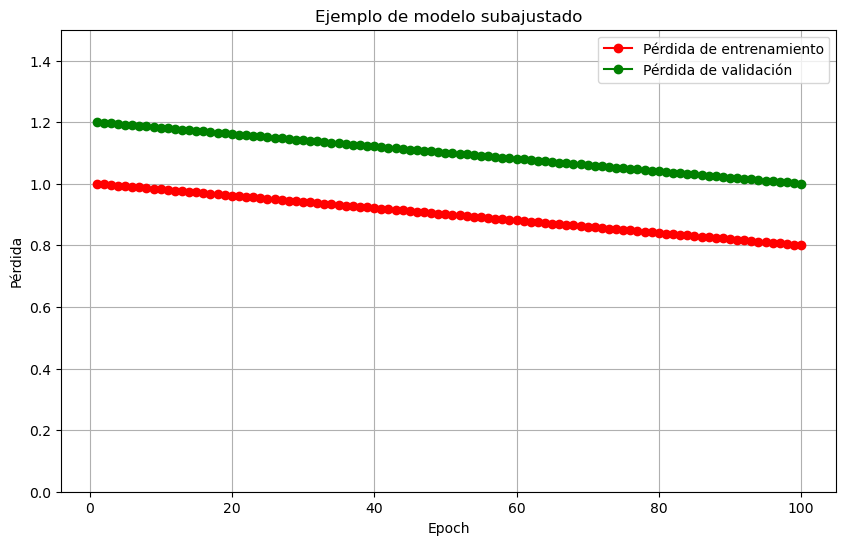

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate epochs
epochs = np.arange(1, 101)

# Simulate training and validation loss
train_loss = np.linspace(1.0, 0.8, len(epochs))
val_loss = np.linspace(1.2, 1.0, len(epochs))

# Adding some noise to simulate realistic scenarios
train_loss_std = 0.02 * np.random.randn(len(epochs))
val_loss_std = 0.05 * np.random.randn(len(epochs))

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.title("Ejemplo de modelo subajustado")
plt.xlabel("Epoch")
plt.ylabel("Pérdida")
plt.ylim(0.0, 1.5)
plt.grid()


plt.plot(epochs, train_loss, 'o-', color="r", label="Pérdida de entrenamiento")

plt.plot(epochs, val_loss, 'o-', color="g", label="Pérdida de validación")

plt.legend(loc="best")
plt.show()


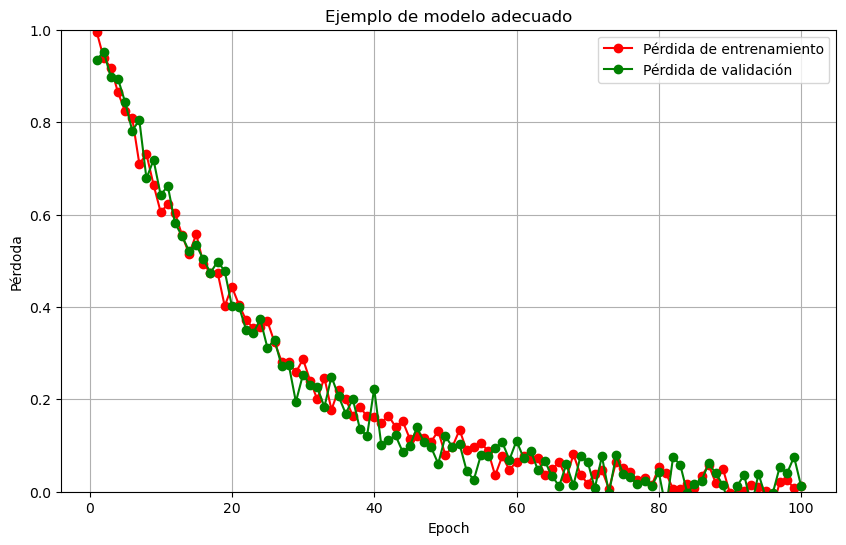

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate epochs
epochs = np.arange(1, 101)

# Simulate training and validation loss
train_loss = np.logspace(0, -2, len(epochs)) + 0.02 * np.random.randn(len(epochs))
val_loss = np.logspace(0, -2, len(epochs)) + 0.03 * np.random.randn(len(epochs))

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.title("Ejemplo de modelo adecuado")
plt.xlabel("Epoch")
plt.ylabel("Pérdoda")
plt.ylim(0.0, 1.0)
plt.grid()

plt.plot(epochs, train_loss, 'o-', color="r", label="Pérdida de entrenamiento")
plt.plot(epochs, val_loss, 'o-', color="g", label="Pérdida de validación")

plt.legend(loc="best")
plt.show()


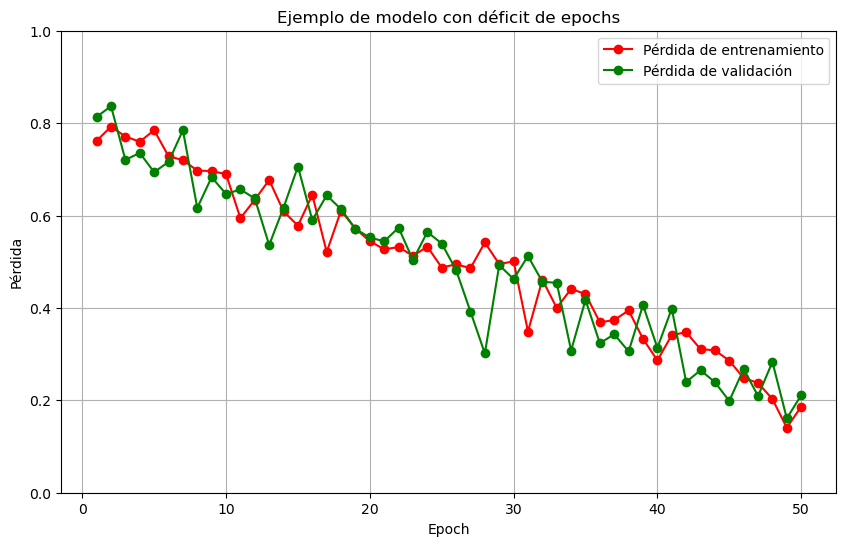

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate epochs
epochs = np.arange(1, 51)  # Fewer epochs

# Simulate training and validation loss
train_loss = np.linspace(0.8, 0.2, len(epochs)) + 0.04 * np.random.randn(len(epochs))
val_loss = np.linspace(0.8, 0.2, len(epochs)) + 0.05 * np.random.randn(len(epochs))

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.title("Ejemplo de modelo con déficit de epochs")
plt.xlabel("Epoch")
plt.ylabel("Pérdida")
plt.ylim(0.0, 1.0)
plt.grid()

plt.plot(epochs, train_loss, 'o-', color="r", label="Pérdida de entrenamiento")
plt.plot(epochs, val_loss, 'o-', color="g", label="Pérdida de validación")

plt.legend(loc="best")
plt.show()


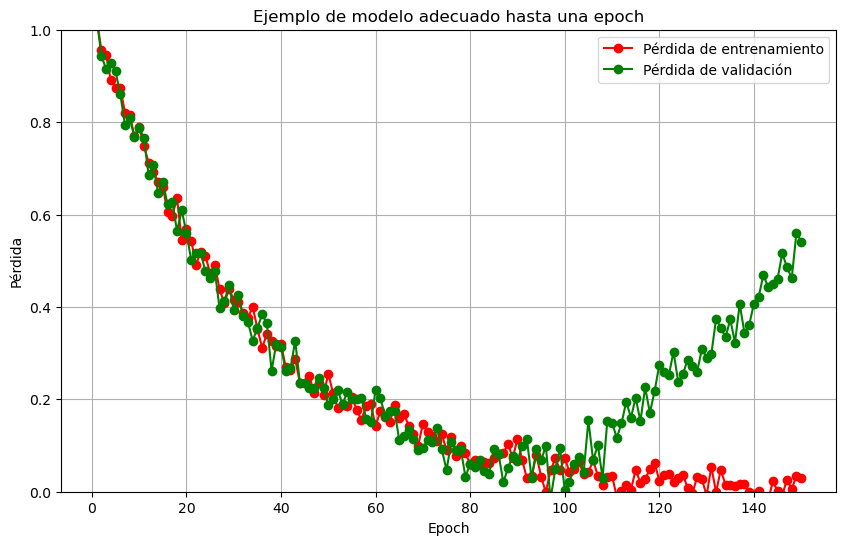

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate epochs
epochs = np.arange(1, 151)

# Simulate training and validation loss
train_loss = np.logspace(0, -2, len(epochs)) + 0.02 * np.random.randn(len(epochs))
val_loss = np.logspace(0, -2, len(epochs)) + 0.03 * np.random.randn(len(epochs))

# Introduce increase in validation loss after 100 epochs
val_loss[100:] += np.linspace(0, 0.5, len(val_loss) - 100)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.title("Ejemplo de modelo adecuado hasta una epoch")
plt.xlabel("Epoch")
plt.ylabel("Pérdida")
plt.ylim(0.0, 1.0)
plt.grid()

plt.plot(epochs, train_loss, 'o-', color="r", label="Pérdida de entrenamiento")
plt.plot(epochs, val_loss, 'o-', color="g", label="Pérdida de validación")

plt.legend(loc="best")
plt.show()


<h2 style="color: #007ACC;"> ¿Cómo corregir sobreajuste y subajuste? </h2>

| Situación         | Sobreajuste                                                         | Subajuste                                                      |
|-------------------|---------------------------------------------------------------------|----------------------------------------------------------------|
| Acción a tomar   | Regularización: Utilizar técnicas como la penalización L1/L2 o dropout para reducir la complejidad del modelo. Reducir el número de características o aumentar los datos de entrenamiento. | Aumentar la complejidad del modelo: Añadir más características relevantes, aumentar el tamaño de la red neuronal o permitir más iteraciones de entrenamiento. |
| Ejemplo de técnica | Regularización L2, dropout, reducción de características, aumentar datos de entrenamiento. | Añadir más características relevantes, aumentar el tamaño de la red neuronal, aumentar el número de iteraciones de entrenamiento. |
| Resultado esperado | Reducción en la varianza del modelo, mejor generalización a datos nuevos. | Aumento en la capacidad del modelo para capturar la complejidad de los datos, mejor ajuste a los datos de entrenamiento. |
| Consideraciones   | Se debe ajustar el parámetro de regularización para equilibrar entre la reducción de sobreajuste y la pérdida de información importante. | Monitorear el rendimiento del modelo en el conjunto de validación para evitar el sobreajuste. Se podría necesitar más datos de entrenamiento si el subajuste persiste. |
| Número de epochs | Reducir para evitar sobreajuste, aumentar si es necesario mejorar el ajuste. | Aumentar para permitir más entrenamiento y mejorar el ajuste del modelo. |
| Número de neuronas | Reducir para simplificar el modelo y evitar sobreajuste, aumentar si el modelo es demasiado simple y no puede capturar la complejidad de los datos. | Aumentar para permitir al modelo capturar mejor la complejidad de los datos, pero evitar un exceso que conduzca al sobreajuste. |
| Número de capas ocultas | Reducir si hay sobreajuste debido a la alta complejidad del modelo, aumentar si el modelo es demasiado simple y no puede capturar la complejidad de los datos. | Aumentar para permitir una representación más profunda de los datos y capturar características más abstractas, pero evitar un exceso que conduzca al sobreajuste. |


<h3 id="subsection1-1" style="color: #003366;"> Ejemplos con Tensorflow </h3>

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

<h3 id="subsection1-1" style="color: #003366;"> Dropout </h3>

In [18]:
# Define the regression model
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dropout(0.2)) # Apagar 20% de las neuronas
model.add(Dense(1))

In [19]:
model.compile()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                60        
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


<h3 id="subsection1-1" style="color: #003366;"> Modelos regularizados </h2>

En el contexto de las redes neuronales, la regularización se utiliza para evitar el sobreajuste (overfitting), un problema común en el aprendizaje supervisado donde el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a datos nuevos. Dos de las técnicas de regularización más utilizadas son L1 (también conocida como regularización de Lasso) y L2 (también conocida como regularización de Ridge).

**Regularización L1:**

Sea $L$ la función de pérdida sin regularización y $L^{L1}$ la función de pérdida con regularización $L1$. La regularización L1 penaliza los coeficientes del modelo basándose en la magnitud absoluta de estos coeficientes:

$$L^{L1} = L + \lambda \sum_{i=1}^{n} \vert w_i \vert$$

**Regularización L2:**

La regularización L2, por otro lado, penaliza los coeficientes del modelo basándose en el cuadrado de su magnitud. La función de pérdida con regularización L2 se define como:

$$L^{L2} = L + \lambda \sum_{i=1}^{n} w_i^2 $$

**Comparación:**

- La regularización L1 puede ser útil para la selección de características, ya que tiende a forzar algunos coeficientes a cero, lo que es útil cuando hay muchas características irrelevantes en los datos.
- La regularización L2, por otro lado, es útil para reducir la varianza del modelo, ya que mantiene todos los pesos pequeños en lugar de forzar algunos a cero.from keras.regularizers import L2

In [20]:
from keras.regularizers import L1, L2

In [21]:
# Define the regression model
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(1, kernel_regularizer=L2()))

In [22]:
model.compile()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                60        
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Define the regression model
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(1, kernel_regularizer=L1()))

In [24]:
model.compile()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                60        
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
